In [85]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# 1 DATA ACQUISITION

In [86]:
df2 = pd.read_excel('../OrdenesdecompraPORTAL1K.xlsx', thousands='.')


In [87]:
pd.options.display.max_columns = None
pd.options.display.float_format = '{:20,.2f}'.format

In [88]:
df2.columns

Index(['NÚMERO PEDIDO', 'ORDEN NÚMERO', 'FECHA ORDEN', 'FECHA ENTREGA',
       'FECHA APROBACION', 'CATEGORÍA', 'SUBCATEGORIA', 'PROVEEDOR', 'USUARIO',
       'USUARIO APROBADOR', 'DIRECCION PEDIDO', 'DIRECCION FACTURACION',
       'CENTRO DE COSTOS', 'PRESUPUESTO', 'PORTAL', 'ESTADO',
       'PRODUCTO O SERVICIO', 'CODIGO PORTAL', 'CANTIDAD PEDIDA',
       'CANTIDAD RECIBIDA', 'PRECIO UNITARIO', 'PRECIO UNITARIO + IVA', 'IVA',
       'TOTAL SIN IVA', 'TOTAL + IVA', 'FECHA ULTIMO MOVIMIENTO',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

In [89]:
df2 = df2[['NÚMERO PEDIDO', 'ORDEN NÚMERO', 'FECHA ORDEN', 'FECHA ENTREGA',
       'FECHA APROBACION', 'CATEGORÍA', 'SUBCATEGORIA', 'PROVEEDOR', 'USUARIO',
       'USUARIO APROBADOR', 'DIRECCION PEDIDO', 'DIRECCION FACTURACION',
       'CENTRO DE COSTOS', 'PRESUPUESTO', 'PORTAL', 'ESTADO',
       'PRODUCTO O SERVICIO', 'CODIGO PORTAL', 'CANTIDAD PEDIDA',
       'CANTIDAD RECIBIDA', 'PRECIO UNITARIO', 'PRECIO UNITARIO + IVA', 'IVA',
       'TOTAL SIN IVA', 'TOTAL + IVA', 'FECHA ULTIMO MOVIMIENTO']]

In [90]:
df = pd.read_excel('../B_Ordenes_04-10-2021.xlsx', thousands='.')

In [91]:
df.columns

Index(['NÚMERO PEDIDO', 'ORDEN NÚMERO', 'FECHA ORDEN', 'FECHA ENTREGA',
       'FECHA APROBACIÓN', 'CATEGORÍA', 'SUBCATEGORÍA', 'PROVEEDOR', 'USUARIO',
       'USUARIO APROBADOR', 'DIRECCIÓN DE  ENTREGA', 'DIRECCIÓN FACTURACIÓN',
       'CENTRO COSTO', 'PRESUPUESTO', 'COMPAÑÍA COMPRADORA', 'ESTADO',
       'PRODUCTO O SERVICIO', 'CÓDIGO PRODUCTO', 'CANTIDAD PEDIDA',
       'CANTIDAD RECIBIDA', 'PRECIO UNITARIO', 'PRECIO UNITARIO + IVA', 'IVA',
       'TOTAL SIN IVA', 'TOTAL + IVA', 'FECHA ÚLTIMO MOVIMIENTO'],
      dtype='object')

In [92]:
df2.columns = df.columns

In [93]:
df.columns == df2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [94]:
df = df2

Describe and info of the df

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23083 entries, 0 to 23082
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NÚMERO PEDIDO            23083 non-null  object 
 1   ORDEN NÚMERO             23083 non-null  object 
 2   FECHA ORDEN              23083 non-null  object 
 3   FECHA ENTREGA            18770 non-null  object 
 4   FECHA APROBACIÓN         21950 non-null  object 
 5   CATEGORÍA                23083 non-null  object 
 6   SUBCATEGORÍA             23083 non-null  object 
 7   PROVEEDOR                23083 non-null  object 
 8   USUARIO                  23083 non-null  object 
 9   USUARIO APROBADOR        21950 non-null  object 
 10  DIRECCIÓN DE  ENTREGA    23083 non-null  object 
 11  DIRECCIÓN FACTURACIÓN    10828 non-null  object 
 12  CENTRO COSTO             16672 non-null  object 
 13  PRESUPUESTO              18581 non-null  object 
 14  COMPAÑÍA COMPRADORA   

# DATA PREPARATION

# 1. Data integration

There are no more data integration to join. I have only the .xlsx file

# 2. IRELEVANT VARIABLES

## 2.1 Duplicated rows

In [96]:
df.duplicated(keep='first').sum()

691

In [97]:
df.drop_duplicates(keep='first', inplace=True)

## 2.2 Irrelevant columns

Until we know the objective of this project, we couldn´t drop some variables, but for now, let´s do a clasical ML model

In [98]:
df.head(2)

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACIÓN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,USUARIO,USUARIO APROBADOR,DIRECCIÓN DE ENTREGA,DIRECCIÓN FACTURACIÓN,CENTRO COSTO,PRESUPUESTO,COMPAÑÍA COMPRADORA,ESTADO,PRODUCTO O SERVICIO,CÓDIGO PRODUCTO,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ÚLTIMO MOVIMIENTO
0,# 49561,# 2582,2021-11-10,2021-11-10,2021-11-10,Eléctricos y Electrónicos,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Usuario solicitante 1,Usuario Aprobador 1,Direccion 1,NaN,Centro de costos 1,Presupuesto 1,Portal comprador 1,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,1200035000063,2.00,nan,23364,27803,4439,46728,55606,2021-11-10
1,# 49560,# 2581,2021-11-10,2021-11-11,2021-11-10,Mercadeo y publicidad,Publicidad,Proveedor 2,Usuario solicitante 2,Usuario Aprobador 2,Direccion 1,NaN,Centro de costos 2,Presupuesto 2,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1K15774,1.00,1.00,1476972,1757597,280625,1476972,1757597,2021-11-10


In [99]:
for i in df.columns:
    print('------------------', i, '------------------' )
    percentage = df[i].value_counts()/df[i].count()*100
    
    print(percentage)

------------------ NÚMERO PEDIDO ------------------
# 47594                   0.55
# 47595                   0.55
# 47951                   0.54
# 49268                   0.50
# 48135                   0.33
                  ...         
# 46437                   0.00
# 38977                   0.00
# 47056                   0.00
# 48873                   0.00
# 41760                   0.00
Name: NÚMERO PEDIDO, Length: 7133, dtype: float64
------------------ ORDEN NÚMERO ------------------
# 3                      0.85
# 4                      0.78
# 7                      0.74
# 22                     0.60
# 2                      0.52
                 ...         
# 2246                   0.00
# 2001                   0.00
# 2329                   0.00
# 2340                   0.00
# 2472                   0.00
Name: ORDEN NÚMERO, Length: 2584, dtype: float64
------------------ FECHA ORDEN ------------------
2019-11-30                   1.61
2019-12-02                   1.36
2019-11-2

In [100]:
df.columns = df.columns.str.replace(' ', '_')

In [101]:
df.columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'FECHA_ORDEN', 'FECHA_ENTREGA',
       'FECHA_APROBACIÓN', 'CATEGORÍA', 'SUBCATEGORÍA', 'PROVEEDOR', 'USUARIO',
       'USUARIO_APROBADOR', 'DIRECCIÓN_DE__ENTREGA', 'DIRECCIÓN_FACTURACIÓN',
       'CENTRO_COSTO', 'PRESUPUESTO', 'COMPAÑÍA_COMPRADORA', 'ESTADO',
       'PRODUCTO_O_SERVICIO', 'CÓDIGO_PRODUCTO', 'CANTIDAD_PEDIDA',
       'CANTIDAD_RECIBIDA', 'PRECIO_UNITARIO', 'PRECIO_UNITARIO_+_IVA', 'IVA',
       'TOTAL_SIN_IVA', 'TOTAL_+_IVA', 'FECHA_ÚLTIMO_MOVIMIENTO'],
      dtype='object')

In [102]:
cols_to_drop = ['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'FECHA_ENTREGA','FECHA_APROBACIÓN', 'USUARIO', 'USUARIO_APROBADOR', 
                'DIRECCIÓN_DE__ENTREGA', 'DIRECCIÓN_FACTURACIÓN', 'CENTRO_COSTO', 'PRESUPUESTO', 'CÓDIGO_PRODUCTO', 
                'PRECIO_UNITARIO_+_IVA', 'TOTAL_+_IVA', 'FECHA_ÚLTIMO_MOVIMIENTO'
               ]

In [103]:
df.drop(cols_to_drop, inplace=True, axis=1)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22392 entries, 0 to 23082
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA_ORDEN          22392 non-null  object 
 1   CATEGORÍA            22392 non-null  object 
 2   SUBCATEGORÍA         22392 non-null  object 
 3   PROVEEDOR            22392 non-null  object 
 4   COMPAÑÍA_COMPRADORA  22392 non-null  object 
 5   ESTADO               22392 non-null  object 
 6   PRODUCTO_O_SERVICIO  22392 non-null  object 
 7   CANTIDAD_PEDIDA      22392 non-null  float64
 8   CANTIDAD_RECIBIDA    15325 non-null  float64
 9   PRECIO_UNITARIO      22392 non-null  int64  
 10  IVA                  22392 non-null  int64  
 11  TOTAL_SIN_IVA        22392 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


# 3. STATISTICAL DESCRIPTION

In [105]:
df.describe()

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
count,"22,392.00","15,325.00","22,392.00","22,392.00","22,392.00"
mean,196.68,72.36,"74,075.31","11,499.70","477,558.94"
std,"1,976.19","1,063.97","644,263.68","104,931.32","3,160,637.57"
min,0.27,0.00,0.00,0.00,0.00
25%,2.00,2.00,"1,861.00",93.00,"29,412.00"
50%,7.00,5.00,"11,400.00","1,040.00","90,756.00"
75%,40.00,19.00,"32,222.00","5,588.00","294,118.00"
max,"120,000.00","53,620.00","33,242,814.00","6,316,135.00","299,185,326.00"


In [106]:
df['PRECIO_UNITARIO'] = pd.to_numeric(df['PRECIO_UNITARIO'], downcast="float")
df['IVA'] = pd.to_numeric(df['IVA'], downcast="float")
df['TOTAL_SIN_IVA'] = pd.to_numeric(df['TOTAL_SIN_IVA'], downcast="float")

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22392 entries, 0 to 23082
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA_ORDEN          22392 non-null  object 
 1   CATEGORÍA            22392 non-null  object 
 2   SUBCATEGORÍA         22392 non-null  object 
 3   PROVEEDOR            22392 non-null  object 
 4   COMPAÑÍA_COMPRADORA  22392 non-null  object 
 5   ESTADO               22392 non-null  object 
 6   PRODUCTO_O_SERVICIO  22392 non-null  object 
 7   CANTIDAD_PEDIDA      22392 non-null  float64
 8   CANTIDAD_RECIBIDA    15325 non-null  float64
 9   PRECIO_UNITARIO      22392 non-null  float32
 10  IVA                  22392 non-null  float32
 11  TOTAL_SIN_IVA        22392 non-null  float32
dtypes: float32(3), float64(2), object(7)
memory usage: 2.0+ MB


In [108]:
df['FECHA_ORDEN'] = pd.to_datetime(df['FECHA_ORDEN'], format='%Y-%m-%d')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22392 entries, 0 to 23082
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FECHA_ORDEN          22392 non-null  datetime64[ns]
 1   CATEGORÍA            22392 non-null  object        
 2   SUBCATEGORÍA         22392 non-null  object        
 3   PROVEEDOR            22392 non-null  object        
 4   COMPAÑÍA_COMPRADORA  22392 non-null  object        
 5   ESTADO               22392 non-null  object        
 6   PRODUCTO_O_SERVICIO  22392 non-null  object        
 7   CANTIDAD_PEDIDA      22392 non-null  float64       
 8   CANTIDAD_RECIBIDA    15325 non-null  float64       
 9   PRECIO_UNITARIO      22392 non-null  float32       
 10  IVA                  22392 non-null  float32       
 11  TOTAL_SIN_IVA        22392 non-null  float32       
dtypes: datetime64[ns](1), float32(3), float64(2), object(6)
memory usage: 2.0+ MB


## By year

In [110]:
df_Y = df.groupby(pd.Grouper(key='FECHA_ORDEN', freq="Y")).sum()
df_Y.head()

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
FECHA_ORDEN,,,,,
2018-12-31,"2,825,660.70",962.00,"56,846,176.00","10,468,057.00","660,102,848.00"
2019-12-31,"500,896.00","167,714.00","169,135,712.00","27,660,022.00","2,787,268,864.00"
2020-12-31,"298,243.78","261,158.96","158,323,184.00","25,843,618.00","2,755,058,176.00"
2021-12-31,"779,247.15","679,086.10","1,274,389,248.00","193,529,664.00","4,491,069,952.00"


In [111]:
px.bar(df_Y, y='TOTAL_SIN_IVA')

## By Month

In [112]:
df_M = df.groupby(pd.Grouper(key='FECHA_ORDEN', freq="M")).sum()
df_M

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
FECHA_ORDEN,,,,,
2018-04-30,22.00,22.00,"126,722.00","24,078.00","643,529.00"
2018-05-31,"179,909.93",182.00,"17,952,810.00","3,397,901.00","86,983,344.00"
2018-06-30,"481,225.57",160.00,"16,467,157.00","2,910,354.00","101,410,232.00"
2018-07-31,"250,286.19",0.00,"12,030,855.00","2,273,663.00","106,887,144.00"
2018-08-31,"323,701.00",583.00,"3,449,758.00","642,979.00","85,446,688.00"
2018-09-30,"333,671.01",12.00,"2,394,064.00","402,736.00","80,714,904.00"
2018-10-31,"450,440.00",0.00,"3,675,876.00","683,678.00","105,108,312.00"
2018-11-30,"457,966.00",0.00,"466,431.00","81,481.00","55,557,620.00"
2018-12-31,"348,439.00",3.00,"282,501.00","51,187.00","37,351,064.00"


In [113]:
px.bar(df_M, y='TOTAL_SIN_IVA')

## Categoría

In [114]:
df_CAT = df.groupby('CATEGORÍA').sum()
df_CAT.sort_values(by='TOTAL_SIN_IVA', inplace=True, ascending=False)
df_CAT

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
CATEGORÍA,,,,,
Vigilancia y seguridad industrial,"234,476.00","233,765.00","233,409,776.00","44,227,524.00","4,339,572,224.00"
Alimentos y Bebidas,"2,763,255.73","85,211.76","106,555,080.00","13,873,146.00","1,928,684,544.00"
Construcción y Mantenimiento,"2,502.00","2,161.00","303,148,960.00","40,068,148.00","882,860,608.00"
Dotación y elementos de protección personal,"27,001.00","14,403.00","46,851,856.00","8,302,189.00","715,481,920.00"
Servicios Profesionales,298.50,222.50,"396,780,192.00","74,664,856.00","602,906,112.00"
Químicos y derivados,"44,667.70","41,351.00","23,887,690.00","1,314,261.00","383,131,712.00"
Almacenamiento y empaques,"322,955.70","200,696.80","8,105,723.00","1,482,934.00","362,158,528.00"
Vehículos y repuestos,"17,334.00","13,482.00","51,944,152.00","9,400,447.00","209,335,776.00"
Mercadeo y publicidad,"100,534.00","71,441.00","62,464,332.00","9,526,379.00","195,689,648.00"


In [120]:
#df_CAT['TOTAL_SIN_IVA'].sum()
#df_CAT.sort_values(by='TOTAL_SIN_IVA', inplace=True, ascending=False)
#df['CATEGORÍA'].value_counts()/len(df)*100
df_CAT['%_TOTAL_SIN_IVA'] = df_CAT['TOTAL_SIN_IVA']/df_CAT['TOTAL_SIN_IVA'].sum()*100
df_CAT

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA,%_TOTAL_SIN_IVA
CATEGORÍA,,,,,,
Vigilancia y seguridad industrial,"234,476.00","233,765.00","233,409,776.00","44,227,524.00","4,339,572,224.00",40.58
Alimentos y Bebidas,"2,763,255.73","85,211.76","106,555,080.00","13,873,146.00","1,928,684,544.00",18.04
Construcción y Mantenimiento,"2,502.00","2,161.00","303,148,960.00","40,068,148.00","882,860,608.00",8.26
Dotación y elementos de protección personal,"27,001.00","14,403.00","46,851,856.00","8,302,189.00","715,481,920.00",6.69
Servicios Profesionales,298.50,222.50,"396,780,192.00","74,664,856.00","602,906,112.00",5.64
Químicos y derivados,"44,667.70","41,351.00","23,887,690.00","1,314,261.00","383,131,712.00",3.58
Almacenamiento y empaques,"322,955.70","200,696.80","8,105,723.00","1,482,934.00","362,158,528.00",3.39
Vehículos y repuestos,"17,334.00","13,482.00","51,944,152.00","9,400,447.00","209,335,776.00",1.96
Mercadeo y publicidad,"100,534.00","71,441.00","62,464,332.00","9,526,379.00","195,689,648.00",1.83


In [133]:
df_CAT.loc['Vigilancia y seguridad industrial', '%_TOTAL_SIN_IVA']

40.581406

In [135]:
df_CAT.iloc[0,6]

IndexError: single positional indexer is out-of-bounds

In [129]:
acum_TOTAL_SIN_IVA = 0
for i in range (0, len(df_CAT)):
    acum = df_CAT.loc[i, '%_TOTAL_SIN_IVA']
    acum_TOTAL_SIN_IVA += acum
    if acum_TOTAL_SIN_IVA > 80:
        break
acum_TOTAL_SIN_IVA
#threshold_categoria = (df['TOTAL_SIN_IVA'].value_counts()/len(df)*100 > 5).sum()

KeyError: 0

In [ ]:
df_CAT.groupby('TOTAL_SIN_IVA').agg(
    {
    'KMeans_Cluster': 'count',    
    'CATEGORÍA':  lambda x: x.value_counts().index[0],
    'SUBCATEGORÍA': lambda x: x.value_counts().index[0],
    'PROVEEDOR': lambda x: x.value_counts().index[0],
    'CANTIDAD_PEDIDA': 'mean',
    'CANTIDAD_RECIBIDA': 'mean',
    'PRECIO_UNITARIO': 'mean',
    'TOTAL_SIN_IVA': 'mean',
    })

In [31]:
px.bar(df_CAT, y='TOTAL_SIN_IVA')

In [32]:
px.bar(df_CAT, y='CANTIDAD_PEDIDA')

## Compañía compradora

In [33]:
df_Comp = df.groupby('COMPAÑÍA_COMPRADORA').sum()
df_Comp.sort_values(by='TOTAL_SIN_IVA', inplace=True, ascending=False)
df_Comp

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
COMPAÑÍA_COMPRADORA,,,,,
Portal comprador 24,"231,092.00","231,092.00","217,180,464.00","41,264,144.00","4,293,598,464.00"
Portal comprador 1,"432,971.20","414,527.30","1,085,985,536.00","166,869,024.00","2,742,179,328.00"
Portal comprador 2,"457,901.23","367,442.26","100,662,184.00","12,458,101.00","1,611,188,352.00"
Portal comprador 6,"21,637.00","10,844.00","41,397,468.00","7,806,431.00","555,513,088.00"
Portal comprador 18,"56,940.00","53,874.00","1,447,513.00","267,510.00","436,416,352.00"
Portal comprador 29,"2,838,287.00",147.00,"2,838,362.00","494,922.00","409,359,680.00"
Portal comprador 30,"319,852.70",695.00,"15,856,626.00","2,926,829.00","210,401,360.00"
Portal comprador 4,"4,250.00","3,861.00","76,941,864.00","10,217,062.00","160,436,176.00"
Portal comprador 8,"1,307.00",463.00,"56,746,584.00","9,124,132.00","102,270,872.00"


In [34]:
px.bar(df_Comp, y='TOTAL_SIN_IVA')

In [35]:
df_Comp_count = df.groupby('COMPAÑÍA_COMPRADORA').count()
df_Comp_count.sort_values(by='TOTAL_SIN_IVA', inplace=True, ascending=False)
df_Comp_count

,FECHA_ORDEN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
COMPAÑÍA_COMPRADORA,,,,,,,,,,,
Portal comprador 1,6563,6563,6563,6563,6563,6563,6563,5577,6563,6563,6563
Portal comprador 24,5439,5439,5439,5439,5439,5439,5439,5439,5439,5439,5439
Portal comprador 2,3863,3863,3863,3863,3863,3863,3863,3095,3863,3863,3863
Portal comprador 29,3320,3320,3320,3320,3320,3320,3320,2,3320,3320,3320
Portal comprador 6,850,850,850,850,850,850,850,230,850,850,850
Portal comprador 30,760,760,760,760,760,760,760,29,760,760,760
Portal comprador 4,361,361,361,361,361,361,361,288,361,361,361
Portal comprador 8,318,318,318,318,318,318,318,107,318,318,318
Portal comprador 5,296,296,296,296,296,296,296,256,296,296,296


# 4. DATA CLEANING

## 4.1 Remove outliers

There are not outliers in the DS

In [36]:
df.describe()

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
count,"22,392.00","15,325.00","22,392.00","22,392.00","22,392.00"
mean,196.68,72.36,"74,073.20","11,500.22","477,558.03"
std,"1,976.19","1,063.97","644,253.06","104,934.27","3,160,620.25"
min,0.27,0.00,0.00,0.00,0.00
25%,2.00,2.00,"1,861.00",93.00,"29,412.00"
50%,7.00,5.00,"11,400.00","1,040.00","90,756.00"
75%,40.00,19.00,"32,222.00","5,588.00","294,118.00"
max,"120,000.00","53,620.00","33,242,814.00","6,316,135.00","299,185,312.00"


## 4.2 Fill NA

In [37]:
df.isna().sum()/len(df)*100

FECHA_ORDEN                           0.00
CATEGORÍA                             0.00
SUBCATEGORÍA                          0.00
PROVEEDOR                             0.00
COMPAÑÍA_COMPRADORA                   0.00
ESTADO                                0.00
PRODUCTO_O_SERVICIO                   0.00
CANTIDAD_PEDIDA                       0.00
CANTIDAD_RECIBIDA                    31.56
PRECIO_UNITARIO                       0.00
IVA                                   0.00
TOTAL_SIN_IVA                         0.00
dtype: float64

'CANTIDAD_RECIBIDA': to create other variable later

In [38]:
df.loc[df['CANTIDAD_RECIBIDA'].isna(), 'CANTIDAD_RECIBIDA'] = 0

In [39]:
df.isna().sum()/len(df)*100

FECHA_ORDEN                           0.00
CATEGORÍA                             0.00
SUBCATEGORÍA                          0.00
PROVEEDOR                             0.00
COMPAÑÍA_COMPRADORA                   0.00
ESTADO                                0.00
PRODUCTO_O_SERVICIO                   0.00
CANTIDAD_PEDIDA                       0.00
CANTIDAD_RECIBIDA                     0.00
PRECIO_UNITARIO                       0.00
IVA                                   0.00
TOTAL_SIN_IVA                         0.00
dtype: float64

# 5. FEATURE ENGINEERING (NEW VARIABLES)

In [40]:
df.to_csv('Proveindustriales_Data_Cleaned_csv.csv', index=False)

## SUMARIZE CATEGORICAL VARIABLES

In [41]:
df.select_dtypes(['object', 'category']).columns

Index(['CATEGORÍA', 'SUBCATEGORÍA', 'PROVEEDOR', 'COMPAÑÍA_COMPRADORA',
       'ESTADO', 'PRODUCTO_O_SERVICIO'],
      dtype='object')

### Top CATEGORIA

In [42]:
df['CATEGORÍA'].value_counts()/len(df)*100

Alimentos y Bebidas                                          30.98
Vigilancia y seguridad industrial                            27.01
Aseo, Cafetería y Oficina                                    17.14
Dotación y elementos de protección personal                   5.35
Ferreteria                                                    3.53
Almacenamiento y empaques                                     2.06
Vehículos y repuestos                                         1.64
Químicos y derivados                                          1.60
Construcción y Mantenimiento                                  1.30
Servicios Profesionales                                       1.10
Mercadeo y publicidad                                         0.95
Manufactura                                                   0.92
Logística y transporte                                        0.84
Eléctricos y Electrónicos                                     0.76
Mobiliario y decoración                                       

In [43]:
threshold_categoria = (df['CATEGORÍA'].value_counts()/len(df)*100 > 5).sum()
threshold_categoria

4

In [44]:
top_categoria = (df['CATEGORÍA'].value_counts()/len(df)*100)[:threshold_categoria].index

In [45]:
df.loc[~df['CATEGORÍA'].isin(top_categoria), 'CATEGORÍA'] = 'Otros'

In [46]:
df['CATEGORÍA'].value_counts()

Alimentos y Bebidas                            6938
Vigilancia y seguridad industrial              6049
Otros                                          4368
Aseo, Cafetería y Oficina                      3838
Dotación y elementos de protección personal    1199
Name: CATEGORÍA, dtype: int64

### Top  SUBCATEGORÍA

In [47]:
df['SUBCATEGORÍA'].value_counts()/len(df)*100

Seguridad y protección personal                                  27.00
Alimentos preparados y conservados                               10.01
Elementos de aseo y limpieza                                      8.92
Elementos de papelería                                            7.23
Bebidas                                                           5.93
                                                          ...         
Medicamentos                                                      0.00
Calefacción, ventilación y circulación del aire                   0.00
Prevención y control de enfermedades                              0.00
Plantas vivas                                                     0.00
Rodamientos, cojinetes ruedas y engranajes                        0.00
Name: SUBCATEGORÍA, Length: 149, dtype: float64

In [48]:
df.head(10)

,FECHA_ORDEN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,COMPAÑÍA_COMPRADORA,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,2021-11-10,Otros,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Portal comprador 1,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,2.00,0.00,"23,364.00","4,439.00","46,728.00"
1,2021-11-10,Otros,Publicidad,Proveedor 2,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1.00,1.00,"1,476,972.00","280,625.00","1,476,972.00"
2,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Portal comprador 1,Orden en Proceso,Lasagna,10.00,0.00,"15,500.00",0.00,"155,000.00"
3,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Portal comprador 2,Orden en Proceso,Pecho de Res Limpio/Sin Grasa,50.00,0.00,"22,000.00",0.00,"1,100,000.00"
4,2021-11-10,Otros,Otra,Proveedor 5,Portal comprador 3,Recibido,"LIBRO CABEZA, CORAZON Y MANOS",7.00,7.00,"92,084.00","17,496.00","644,588.00"
5,2021-11-10,Otros,Eliminación y tratamiento de desechos,Proveedor 6,Portal comprador 4,Pendiente por Aprobar,Recoleccion de residuos ordinarios,29.00,0.00,"1,588.00",0.00,"46,052.00"
6,2021-11-10,Otros,Eliminación y tratamiento de desechos,Proveedor 6,Portal comprador 1,Orden en Proceso,Recoleccion de residuos ordinarios,117.00,0.00,"1,588.00",0.00,"185,796.00"
7,2021-11-10,Otros,Eliminación y tratamiento de desechos,Proveedor 6,Portal comprador 1,Orden en Proceso,Recoleccion de residuos ordinarios,74.00,0.00,"1,588.00",0.00,"117,512.00"
8,2021-11-10,Otros,Eliminación y tratamiento de desechos,Proveedor 6,Portal comprador 1,Orden en Proceso,Recoleccion de residuos ordinarios,17.00,0.00,"1,588.00",0.00,"26,996.00"
9,2021-11-10,Otros,Eliminación y tratamiento de desechos,Proveedor 6,Portal comprador 1,Orden en Proceso,Recolección de residuos Peligrosos,2.00,0.00,282.00,0.00,564.00


In [49]:
df['SUBCATEGORÍA'] = np.where(df['CATEGORÍA']=='Otros', 'Otros', df['SUBCATEGORÍA'])
df['SUBCATEGORÍA'].value_counts()

Seguridad y protección personal                6045
Otros                                          4368
Alimentos preparados y conservados             2241
Elementos de aseo y limpieza                   1997
Elementos de papelería                         1618
Bebidas                                        1327
Productos de carne y aves de corral             787
Productos lácteos y huevos                      720
Productos de cereales y legumbres               497
Chocolates, azúcares y confitería               453
Camisas y camisetas                             425
Productos de panadería                          398
Vegetales frescos                               295
Pantalones                                      246
Elementos de cafetería                          175
Elementos de bioseguridad                       174
Elementos de protección personal                168
Prendas uniformes                               104
Aceites y grasas comestibles                     97
Calzado     

In [50]:
#threshold_subcategoria = (df['SUBCATEGORÍA'].value_counts()/len(df)*100 > 5).sum()
#TOP_SUBCATEGORÍA = (df['SUBCATEGORÍA'].value_counts()/len(df)*100)[:threshold_subcategoria].index
#TOP_SUBCATEGORÍA

In [51]:
#df.loc[~df['SUBCATEGORÍA'].isin(TOP_SUBCATEGORÍA), 'SUBCATEGORÍA'] =  'Otros'

In [52]:
#df['SUBCATEGORÍA'].value_counts()/len(df)*100

In [53]:
df.head(10)

,FECHA_ORDEN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,COMPAÑÍA_COMPRADORA,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,2021-11-10,Otros,Otros,Proveedor 1,Portal comprador 1,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,2.00,0.00,"23,364.00","4,439.00","46,728.00"
1,2021-11-10,Otros,Otros,Proveedor 2,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1.00,1.00,"1,476,972.00","280,625.00","1,476,972.00"
2,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Portal comprador 1,Orden en Proceso,Lasagna,10.00,0.00,"15,500.00",0.00,"155,000.00"
3,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Portal comprador 2,Orden en Proceso,Pecho de Res Limpio/Sin Grasa,50.00,0.00,"22,000.00",0.00,"1,100,000.00"
4,2021-11-10,Otros,Otros,Proveedor 5,Portal comprador 3,Recibido,"LIBRO CABEZA, CORAZON Y MANOS",7.00,7.00,"92,084.00","17,496.00","644,588.00"
5,2021-11-10,Otros,Otros,Proveedor 6,Portal comprador 4,Pendiente por Aprobar,Recoleccion de residuos ordinarios,29.00,0.00,"1,588.00",0.00,"46,052.00"
6,2021-11-10,Otros,Otros,Proveedor 6,Portal comprador 1,Orden en Proceso,Recoleccion de residuos ordinarios,117.00,0.00,"1,588.00",0.00,"185,796.00"
7,2021-11-10,Otros,Otros,Proveedor 6,Portal comprador 1,Orden en Proceso,Recoleccion de residuos ordinarios,74.00,0.00,"1,588.00",0.00,"117,512.00"
8,2021-11-10,Otros,Otros,Proveedor 6,Portal comprador 1,Orden en Proceso,Recoleccion de residuos ordinarios,17.00,0.00,"1,588.00",0.00,"26,996.00"
9,2021-11-10,Otros,Otros,Proveedor 6,Portal comprador 1,Orden en Proceso,Recolección de residuos Peligrosos,2.00,0.00,282.00,0.00,564.00


### Top PRODUCTO_O_SERVICIO

In [54]:
#df.drop('PRODUCTO_O_SERVICIO', axis=1, inplace=True)
df['PRODUCTO_O_SERVICIO'].value_counts()/len(df)*100

6 Bota de seguridad media caña dielectrica con puntera de seguridad                                            3.45
85 Overol industrial                                                                                           1.46
7 Botas de caucho con puntera negra caña alta                                                                  0.84
30 Lentes de seguridad oscuro                                                                                  0.81
8 Bota pvc de seguridad caña alta, dielectrica con puntera de seguridad                                        0.78
                                                                                                       ...         
S777702 PULSADOR 22MM HONGO VERDE SIN RETENCION CON PASE N.O                                                   0.00
CAMISETA POLO MANGA LARGA ( CAMIBUZO) GRIS CON NARANJA TECNICOS Y CONDUCTORES HOMBRE Talla S                   0.00
PERFIL OMEGA BASE 6                                                     

In [55]:
df['PRODUCTO_O_SERVICIO'] = np.where(df['CATEGORÍA']=='Otros', 'Otros', df['PRODUCTO_O_SERVICIO'])
df['PRODUCTO_O_SERVICIO'].value_counts()

Otros                                                                  4368
6 Bota de seguridad media caña dielectrica con puntera de seguridad     773
85 Overol industrial                                                    326
7 Botas de caucho con puntera negra caña alta                           187
30 Lentes de seguridad oscuro                                           181
                                                                       ... 
7000017 PAÑO MULTIUSOS                                                    1
Cepillo Plancha Fibra Media Task                                          1
CAMISETA POLO HOMBRE CON LOGO (GRIS)  / 5XL - 7XL                         1
Guante Nitrilo Negro Calibre 6 Protexion X 100 Und L                      1
Camibuzo azul Navy Dama Talla L                                           1
Name: PRODUCTO_O_SERVICIO, Length: 1863, dtype: int64

In [56]:
df.head(10)

,FECHA_ORDEN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,COMPAÑÍA_COMPRADORA,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,2021-11-10,Otros,Otros,Proveedor 1,Portal comprador 1,Orden en Proceso,Otros,2.00,0.00,"23,364.00","4,439.00","46,728.00"
1,2021-11-10,Otros,Otros,Proveedor 2,Portal comprador 1,Recibido,Otros,1.00,1.00,"1,476,972.00","280,625.00","1,476,972.00"
2,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Portal comprador 1,Orden en Proceso,Lasagna,10.00,0.00,"15,500.00",0.00,"155,000.00"
3,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Portal comprador 2,Orden en Proceso,Pecho de Res Limpio/Sin Grasa,50.00,0.00,"22,000.00",0.00,"1,100,000.00"
4,2021-11-10,Otros,Otros,Proveedor 5,Portal comprador 3,Recibido,Otros,7.00,7.00,"92,084.00","17,496.00","644,588.00"
5,2021-11-10,Otros,Otros,Proveedor 6,Portal comprador 4,Pendiente por Aprobar,Otros,29.00,0.00,"1,588.00",0.00,"46,052.00"
6,2021-11-10,Otros,Otros,Proveedor 6,Portal comprador 1,Orden en Proceso,Otros,117.00,0.00,"1,588.00",0.00,"185,796.00"
7,2021-11-10,Otros,Otros,Proveedor 6,Portal comprador 1,Orden en Proceso,Otros,74.00,0.00,"1,588.00",0.00,"117,512.00"
8,2021-11-10,Otros,Otros,Proveedor 6,Portal comprador 1,Orden en Proceso,Otros,17.00,0.00,"1,588.00",0.00,"26,996.00"
9,2021-11-10,Otros,Otros,Proveedor 6,Portal comprador 1,Orden en Proceso,Otros,2.00,0.00,282.00,0.00,564.00


In [205]:
#threshold_producto = (df['PRODUCTO_O_SERVICIO'].value_counts()/len(df)*100 > 0.5).sum()
#threshold_producto

10

In [206]:
#TOP_PRODUCTO_O_SERVICIO = (df['PRODUCTO_O_SERVICIO'].value_counts()/len(df)*100)[:threshold_producto].index
#TOP_PRODUCTO_O_SERVICIO

Index(['6 Bota de seguridad media caña dielectrica con puntera de seguridad',
       '85 Overol industrial', '7 Botas de caucho con puntera negra caña alta',
       '30 Lentes de seguridad oscuro ',
       '8 Bota pvc de seguridad caña alta, dielectrica con puntera de seguridad',
       '46 Guantes nitrilo azul no esteriles', '86 Camisa oxfort manga larga',
       'PAPEL BOND 72 g CARTA x 500 H ECOLOGICO NATURAL',
       '48 Guantes vaqueta ingeniero reforzado ', '87 Pantalon jean dotacion'],
      dtype='object')

In [207]:
#df.loc[~df['PRODUCTO_O_SERVICIO'].isin(TOP_PRODUCTO_O_SERVICIO), 'PRODUCTO_O_SERVICIO'] =  'Otros'

In [208]:
#df['PRODUCTO_O_SERVICIO'].value_counts()

Otros                                                                      20065
6 Bota de seguridad media caña dielectrica con puntera de seguridad          773
85 Overol industrial                                                         326
7 Botas de caucho con puntera negra caña alta                                187
30 Lentes de seguridad oscuro                                                181
8 Bota pvc de seguridad caña alta, dielectrica con puntera de seguridad      174
46 Guantes nitrilo azul no esteriles                                         157
86 Camisa oxfort manga larga                                                 151
PAPEL BOND 72 g CARTA x 500 H ECOLOGICO NATURAL                              148
48 Guantes vaqueta ingeniero reforzado                                       117
87 Pantalon jean dotacion                                                    113
Name: PRODUCTO_O_SERVICIO, dtype: int64

### Top PROVEEDOR

In [57]:
df['PROVEEDOR'].value_counts()/len(df)*100

Proveedor 301                  24.29
Proveedor 59                    6.93
Proveedor 28                    6.34
Proveedor 26                    5.43
Proveedor 321                   4.33
                        ...         
Proveedor 187                   0.00
Proveedor 286                   0.00
Proveedor 172                   0.00
Proveedor 305                   0.00
Proveedor 197                   0.00
Name: PROVEEDOR, Length: 405, dtype: float64

In [353]:
#df['PROVEEDOR'] = np.where(df['CATEGORÍA']=='Otros', 'Otros', df['PROVEEDOR'])
#df['PROVEEDOR'].value_counts()

Proveedor 301    5439
Otros            4368
Proveedor 59     1535
Proveedor 28     1414
Proveedor 26     1132
                 ... 
Proveedor 299       1
Proveedor 272       1
Proveedor 298       1
Proveedor 245       1
Proveedor 264       1
Name: PROVEEDOR, Length: 160, dtype: int64

In [58]:
threshold_proveedor = (df['PROVEEDOR'].value_counts()/len(df)*100 > 5).sum()
TOP_PROVEEDOR= (df['PROVEEDOR'].value_counts()/len(df)*100)[:threshold_proveedor].index
TOP_PROVEEDOR

Index(['Proveedor 301', 'Proveedor 59', 'Proveedor 28', 'Proveedor 26'], dtype='object')

In [59]:
df.loc[~df['PROVEEDOR'].isin(TOP_PROVEEDOR), 'PROVEEDOR'] =  'Otros'

In [60]:
df['PROVEEDOR'].value_counts()/len(df)*100

Otros                          57.01
Proveedor 301                  24.29
Proveedor 59                    6.93
Proveedor 28                    6.34
Proveedor 26                    5.43
Name: PROVEEDOR, dtype: float64

In [61]:
df.head(10)

,FECHA_ORDEN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,COMPAÑÍA_COMPRADORA,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,2021-11-10,Otros,Otros,Otros,Portal comprador 1,Orden en Proceso,Otros,2.00,0.00,"23,364.00","4,439.00","46,728.00"
1,2021-11-10,Otros,Otros,Otros,Portal comprador 1,Recibido,Otros,1.00,1.00,"1,476,972.00","280,625.00","1,476,972.00"
2,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Otros,Portal comprador 1,Orden en Proceso,Lasagna,10.00,0.00,"15,500.00",0.00,"155,000.00"
3,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Otros,Portal comprador 2,Orden en Proceso,Pecho de Res Limpio/Sin Grasa,50.00,0.00,"22,000.00",0.00,"1,100,000.00"
4,2021-11-10,Otros,Otros,Otros,Portal comprador 3,Recibido,Otros,7.00,7.00,"92,084.00","17,496.00","644,588.00"
5,2021-11-10,Otros,Otros,Otros,Portal comprador 4,Pendiente por Aprobar,Otros,29.00,0.00,"1,588.00",0.00,"46,052.00"
6,2021-11-10,Otros,Otros,Otros,Portal comprador 1,Orden en Proceso,Otros,117.00,0.00,"1,588.00",0.00,"185,796.00"
7,2021-11-10,Otros,Otros,Otros,Portal comprador 1,Orden en Proceso,Otros,74.00,0.00,"1,588.00",0.00,"117,512.00"
8,2021-11-10,Otros,Otros,Otros,Portal comprador 1,Orden en Proceso,Otros,17.00,0.00,"1,588.00",0.00,"26,996.00"
9,2021-11-10,Otros,Otros,Otros,Portal comprador 1,Orden en Proceso,Otros,2.00,0.00,282.00,0.00,564.00


### Top COMPAÑÍA_COMPRADORA

In [62]:
df['COMPAÑÍA_COMPRADORA'].value_counts()/len(df)*100

Portal comprador 1                   29.31
Portal comprador 24                  24.29
Portal comprador 2                   17.25
Portal comprador 29                  14.83
Portal comprador 6                    3.80
Portal comprador 30                   3.39
Portal comprador 4                    1.61
Portal comprador 8                    1.42
Portal comprador 5                    1.32
Portal comprador 12                   0.96
Portal comprador 18                   0.40
Portal comprador 10                   0.31
Portal comprador 7                    0.29
Portal comprador 11                   0.23
Portal comprador 27                   0.16
Portal comprador 13                   0.15
Portal comprador 20                   0.13
Portal comprador 31                   0.07
Portal comprador 21                   0.02
Portal comprador 28                   0.01
Portal comprador 14                   0.01
Portal comprador 26                   0.01
Portal comprador 32                   0.01
Portal comp

In [356]:
#df['COMPAÑÍA_COMPRADORA'] = np.where(df['CATEGORÍA']=='Otros', 'Otros', df['COMPAÑÍA_COMPRADORA'])
#df['COMPAÑÍA_COMPRADORA'].value_counts()

Portal comprador 24    5439
Otros                  4368
Portal comprador 2     3561
Portal comprador 1     3441
Portal comprador 29    3320
Portal comprador 6      842
Portal comprador 30     333
Portal comprador 5      292
Portal comprador 12     214
Portal comprador 8      158
Portal comprador 4      143
Portal comprador 10      65
Portal comprador 11      50
Portal comprador 7       47
Portal comprador 27      35
Portal comprador 13      32
Portal comprador 18      21
Portal comprador 20      20
Portal comprador 21       4
Portal comprador 26       2
Portal comprador 15       1
Portal comprador 9        1
Portal comprador 19       1
Portal comprador 33       1
Portal comprador 22       1
Name: COMPAÑÍA_COMPRADORA, dtype: int64

In [357]:
#df.head(10)

,FECHA_ORDEN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,COMPAÑÍA_COMPRADORA,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,2021-11-10,Otros,Otros,Otros,Otros,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,2.00,0.00,"23,364.00","4,439.00","46,728.00"
1,2021-11-10,Otros,Otros,Otros,Otros,Recibido,ACTIVIDADES COMERCIALES,1.00,1.00,"1,476,972.00","280,625.00","1,476,972.00"
2,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Portal comprador 1,Orden en Proceso,Lasagna,10.00,0.00,"15,500.00",0.00,"155,000.00"
3,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Portal comprador 2,Orden en Proceso,Pecho de Res Limpio/Sin Grasa,50.00,0.00,"22,000.00",0.00,"1,100,000.00"
4,2021-11-10,Otros,Otros,Otros,Otros,Recibido,"LIBRO CABEZA, CORAZON Y MANOS",7.00,7.00,"92,084.00","17,496.00","644,588.00"
5,2021-11-10,Otros,Otros,Otros,Otros,Pendiente por Aprobar,Recoleccion de residuos ordinarios,29.00,0.00,"1,588.00",0.00,"46,052.00"
6,2021-11-10,Otros,Otros,Otros,Otros,Orden en Proceso,Recoleccion de residuos ordinarios,117.00,0.00,"1,588.00",0.00,"185,796.00"
7,2021-11-10,Otros,Otros,Otros,Otros,Orden en Proceso,Recoleccion de residuos ordinarios,74.00,0.00,"1,588.00",0.00,"117,512.00"
8,2021-11-10,Otros,Otros,Otros,Otros,Orden en Proceso,Recoleccion de residuos ordinarios,17.00,0.00,"1,588.00",0.00,"26,996.00"
9,2021-11-10,Otros,Otros,Otros,Otros,Orden en Proceso,Recolección de residuos Peligrosos,2.00,0.00,282.00,0.00,564.00


In [63]:
threshold_compradora = (df['COMPAÑÍA_COMPRADORA'].value_counts()/len(df)*100 > 1).sum()
TOP_COMPAÑIA_COMPRADORA = (df['COMPAÑÍA_COMPRADORA'].value_counts()/len(df)*100)[:threshold_compradora].index
TOP_COMPAÑIA_COMPRADORA

Index(['Portal comprador 1', 'Portal comprador 24', 'Portal comprador 2',
       'Portal comprador 29', 'Portal comprador 6', 'Portal comprador 30',
       'Portal comprador 4', 'Portal comprador 8', 'Portal comprador 5'],
      dtype='object')

In [64]:
df.loc[~df['COMPAÑÍA_COMPRADORA'].isin(TOP_COMPAÑIA_COMPRADORA), 'COMPAÑÍA_COMPRADORA'] =  'Otros'

In [65]:
df['COMPAÑÍA_COMPRADORA'].value_counts()

Portal comprador 1     6563
Portal comprador 24    5439
Portal comprador 2     3863
Portal comprador 29    3320
Portal comprador 6      850
Portal comprador 30     760
Otros                   622
Portal comprador 4      361
Portal comprador 8      318
Portal comprador 5      296
Name: COMPAÑÍA_COMPRADORA, dtype: int64

# 6. CORRELATION ANALYSIS

In [66]:
df.corr()

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
CANTIDAD_PEDIDA,1.00,0.44,-0.01,-0.01,0.02
CANTIDAD_RECIBIDA,0.44,1.00,-0.01,-0.01,0.04
PRECIO_UNITARIO,-0.01,-0.01,1.00,0.86,0.61
IVA,-0.01,-0.01,0.86,1.00,0.45
TOTAL_SIN_IVA,0.02,0.04,0.61,0.45,1.00


<AxesSubplot:>

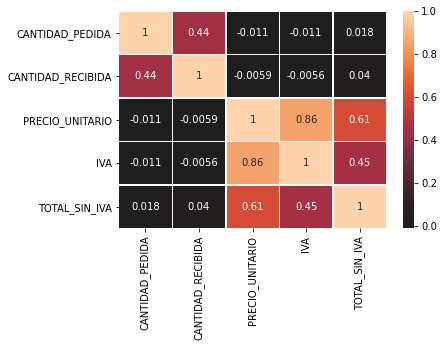

In [67]:
sns.heatmap(df.corr(), center=0, annot=True, linewidths=.5)

In [68]:
df.describe()

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
count,"22,392.00","22,392.00","22,392.00","22,392.00","22,392.00"
mean,196.68,49.52,"74,073.20","11,500.22","477,558.03"
std,"1,976.19",880.83,"644,253.06","104,934.27","3,160,620.25"
min,0.27,0.00,0.00,0.00,0.00
25%,2.00,0.00,"1,861.00",93.00,"29,412.00"
50%,7.00,2.00,"11,400.00","1,040.00","90,756.00"
75%,40.00,10.00,"32,222.00","5,588.00","294,118.00"
max,"120,000.00","53,620.00","33,242,814.00","6,316,135.00","299,185,312.00"


In [69]:
df.to_excel('Proveindustriales_completo.xlsx', index=False)

In [70]:
print('CATEGORÍA: ', len(df['CATEGORÍA'].unique()))
print('SUBCATEGORÍA: ', len(df['SUBCATEGORÍA'].unique()))
print('PROVEEDOR: ', len(df['PROVEEDOR'].unique()))
print('COMPAÑÍA_COMPRADORA: ', len(df['COMPAÑÍA_COMPRADORA'].unique()))
print('PRODUCTO_O_SERVICIO: ', len(df['PRODUCTO_O_SERVICIO'].unique()))

CATEGORÍA:  5
SUBCATEGORÍA:  29
PROVEEDOR:  5
COMPAÑÍA_COMPRADORA:  10
PRODUCTO_O_SERVICIO:  1863


# 8. TRANSFORMATION

In [71]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

## Numeric to Normalized values

In [72]:
df_numeric = df.select_dtypes(['int32', 'int64', 'float32', 'float64'])
df_numeric

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,2.00,0.00,"23,364.00","4,439.00","46,728.00"
1,1.00,1.00,"1,476,972.00","280,625.00","1,476,972.00"
2,10.00,0.00,"15,500.00",0.00,"155,000.00"
3,50.00,0.00,"22,000.00",0.00,"1,100,000.00"
4,7.00,7.00,"92,084.00","17,496.00","644,588.00"
...,...,...,...,...,...
23078,8.00,8.00,"33,613.00","6,387.00","268,908.00"
23079,1.00,1.00,588.00,112.00,588.00
23080,3.00,3.00,"29,412.00","5,588.00","88,235.00"
23081,4.00,4.00,"29,412.00","5,588.00","117,647.00"


In [73]:
df_numeric.describe()

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
count,"22,392.00","22,392.00","22,392.00","22,392.00","22,392.00"
mean,196.68,49.52,"74,073.20","11,500.22","477,558.03"
std,"1,976.19",880.83,"644,253.06","104,934.27","3,160,620.25"
min,0.27,0.00,0.00,0.00,0.00
25%,2.00,0.00,"1,861.00",93.00,"29,412.00"
50%,7.00,2.00,"11,400.00","1,040.00","90,756.00"
75%,40.00,10.00,"32,222.00","5,588.00","294,118.00"
max,"120,000.00","53,620.00","33,242,814.00","6,316,135.00","299,185,312.00"


In [74]:
normalizer = Normalizer()
df_numeric_normalized = pd.DataFrame(normalizer.fit_transform(df_numeric), columns=df_numeric.columns)

In [75]:
df_numeric_normalized.describe()

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
count,"22,392.00","22,392.00","22,392.00","22,392.00","22,392.00"
mean,0.00,0.00,0.25,0.04,0.92
std,0.04,0.02,0.26,0.05,0.12
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.02,0.00,0.89
50%,0.00,0.00,0.14,0.01,0.99
75%,0.00,0.00,0.45,0.06,1.00
max,1.00,0.71,0.97,0.17,1.00


## Categorical to OneHotEncoder

Drop PRODUCTO_O_SERVICIO Delete. if you want to try, delete PRODUCTO_O_SERVICIO too (it has a lot of categories)

In [76]:
df_categorical = df.select_dtypes(['object'])
df_categorical = df_categorical.loc[:, df_categorical.columns != 'PRODUCTO_O_SERVICIO']
df_categorical.head(3)

,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,COMPAÑÍA_COMPRADORA,ESTADO
0,Otros,Otros,Otros,Portal comprador 1,Orden en Proceso
1,Otros,Otros,Otros,Portal comprador 1,Recibido
2,Alimentos y Bebidas,Alimentos preparados y conservados,Otros,Portal comprador 1,Orden en Proceso


In [77]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_Cols = pd.DataFrame(OH_encoder.fit_transform(df_categorical))

In [78]:
OH_Cols.columns =  OH_encoder.get_feature_names(df_categorical.columns)

In [79]:
pd.options.display.float_format = '{:,.7f}'.format

In [80]:
OH_Cols

,CATEGORÍA_Alimentos y Bebidas,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Otros,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Aceites y grasas comestibles,SUBCATEGORÍA_Alimentos preparados y conservados,SUBCATEGORÍA_Bebidas,SUBCATEGORÍA_Calzado,SUBCATEGORÍA_Camisas y camisetas,"SUBCATEGORÍA_Chocolates, azúcares y confitería",SUBCATEGORÍA_Condimentos y conservantes,SUBCATEGORÍA_Elementos de aseo y limpieza,SUBCATEGORÍA_Elementos de bioseguridad,SUBCATEGORÍA_Elementos de cafetería,SUBCATEGORÍA_Elementos de papelería,SUBCATEGORÍA_Elementos de protección personal,SUBCATEGORÍA_Equipo de aseo,SUBCATEGORÍA_Equipo y accesorios de oficina y escritorio,SUBCATEGORÍA_Fruta fresca,SUBCATEGORÍA_Insumos desinfección,SUBCATEGORÍA_Otra,SUBCATEGORÍA_Otros,SUBCATEGORÍA_Pantalones,SUBCATEGORÍA_Prendas uniformes,SUBCATEGORÍA_Productos de carne y aves de corral,SUBCATEGORÍA_Productos de cereales y legumbres,SUBCATEGORÍA_Productos de panadería,SUBCATEGORÍA_Productos lácteos y huevos,SUBCATEGORÍA_Seguridad y control público,SUBCATEGORÍA_Seguridad y protección personal,SUBCATEGORÍA_Señalización,SUBCATEGORÍA_Trabajo en alturas,SUBCATEGORÍA_Vegetales frescos,PROVEEDOR_Otros,PROVEEDOR_Proveedor 26,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,COMPAÑÍA_COMPRADORA_Otros,COMPAÑÍA_COMPRADORA_Portal comprador 1,COMPAÑÍA_COMPRADORA_Portal comprador 2,COMPAÑÍA_COMPRADORA_Portal comprador 24,COMPAÑÍA_COMPRADORA_Portal comprador 29,COMPAÑÍA_COMPRADORA_Portal comprador 30,COMPAÑÍA_COMPRADORA_Portal comprador 4,COMPAÑÍA_COMPRADORA_Portal comprador 5,COMPAÑÍA_COMPRADORA_Portal comprador 6,COMPAÑÍA_COMPRADORA_Portal comprador 8,ESTADO_Cancelado,ESTADO_Enviado,ESTADO_Finalizado Incompleto,ESTADO_Orden Confirmada,ESTADO_Orden Rechazada,ESTADO_Orden en Proceso,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial
0,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000
1,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000
2,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000
3,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.

# CONCAT ONEHOTENCODER WITH NORMALIZED

In [81]:
df_num_encoder_normalized = pd.concat([OH_Cols, df_numeric_normalized], axis=1)
df_num_encoder_normalized

,CATEGORÍA_Alimentos y Bebidas,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Otros,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Aceites y grasas comestibles,SUBCATEGORÍA_Alimentos preparados y conservados,SUBCATEGORÍA_Bebidas,SUBCATEGORÍA_Calzado,SUBCATEGORÍA_Camisas y camisetas,"SUBCATEGORÍA_Chocolates, azúcares y confitería",SUBCATEGORÍA_Condimentos y conservantes,SUBCATEGORÍA_Elementos de aseo y limpieza,SUBCATEGORÍA_Elementos de bioseguridad,SUBCATEGORÍA_Elementos de cafetería,SUBCATEGORÍA_Elementos de papelería,SUBCATEGORÍA_Elementos de protección personal,SUBCATEGORÍA_Equipo de aseo,SUBCATEGORÍA_Equipo y accesorios de oficina y escritorio,SUBCATEGORÍA_Fruta fresca,SUBCATEGORÍA_Insumos desinfección,SUBCATEGORÍA_Otra,SUBCATEGORÍA_Otros,SUBCATEGORÍA_Pantalones,SUBCATEGORÍA_Prendas uniformes,SUBCATEGORÍA_Productos de carne y aves de corral,SUBCATEGORÍA_Productos de cereales y legumbres,SUBCATEGORÍA_Productos de panadería,SUBCATEGORÍA_Productos lácteos y huevos,SUBCATEGORÍA_Seguridad y control público,SUBCATEGORÍA_Seguridad y protección personal,SUBCATEGORÍA_Señalización,SUBCATEGORÍA_Trabajo en alturas,SUBCATEGORÍA_Vegetales frescos,PROVEEDOR_Otros,PROVEEDOR_Proveedor 26,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,COMPAÑÍA_COMPRADORA_Otros,COMPAÑÍA_COMPRADORA_Portal comprador 1,COMPAÑÍA_COMPRADORA_Portal comprador 2,COMPAÑÍA_COMPRADORA_Portal comprador 24,COMPAÑÍA_COMPRADORA_Portal comprador 29,COMPAÑÍA_COMPRADORA_Portal comprador 30,COMPAÑÍA_COMPRADORA_Portal comprador 4,COMPAÑÍA_COMPRADORA_Portal comprador 5,COMPAÑÍA_COMPRADORA_Portal comprador 6,COMPAÑÍA_COMPRADORA_Portal comprador 8,ESTADO_Cancelado,ESTADO_Enviado,ESTADO_Finalizado Incompleto,ESTADO_Orden Confirmada,ESTADO_Orden Rechazada,ESTADO_Orden en Proceso,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000381,0.0000000,0.4456080,0.0846625,0.8912159
1,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000005,0.0000005,0.7008102,0.1331541,0.7008102
2,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000642,0.0000000,0.0995037,0.0000000,0.9950372
3,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00

In [82]:
df_num_encoder_normalized.describe()

,CATEGORÍA_Alimentos y Bebidas,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Otros,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Aceites y grasas comestibles,SUBCATEGORÍA_Alimentos preparados y conservados,SUBCATEGORÍA_Bebidas,SUBCATEGORÍA_Calzado,SUBCATEGORÍA_Camisas y camisetas,"SUBCATEGORÍA_Chocolates, azúcares y confitería",SUBCATEGORÍA_Condimentos y conservantes,SUBCATEGORÍA_Elementos de aseo y limpieza,SUBCATEGORÍA_Elementos de bioseguridad,SUBCATEGORÍA_Elementos de cafetería,SUBCATEGORÍA_Elementos de papelería,SUBCATEGORÍA_Elementos de protección personal,SUBCATEGORÍA_Equipo de aseo,SUBCATEGORÍA_Equipo y accesorios de oficina y escritorio,SUBCATEGORÍA_Fruta fresca,SUBCATEGORÍA_Insumos desinfección,SUBCATEGORÍA_Otra,SUBCATEGORÍA_Otros,SUBCATEGORÍA_Pantalones,SUBCATEGORÍA_Prendas uniformes,SUBCATEGORÍA_Productos de carne y aves de corral,SUBCATEGORÍA_Productos de cereales y legumbres,SUBCATEGORÍA_Productos de panadería,SUBCATEGORÍA_Productos lácteos y huevos,SUBCATEGORÍA_Seguridad y control público,SUBCATEGORÍA_Seguridad y protección personal,SUBCATEGORÍA_Señalización,SUBCATEGORÍA_Trabajo en alturas,SUBCATEGORÍA_Vegetales frescos,PROVEEDOR_Otros,PROVEEDOR_Proveedor 26,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,COMPAÑÍA_COMPRADORA_Otros,COMPAÑÍA_COMPRADORA_Portal comprador 1,COMPAÑÍA_COMPRADORA_Portal comprador 2,COMPAÑÍA_COMPRADORA_Portal comprador 24,COMPAÑÍA_COMPRADORA_Portal comprador 29,COMPAÑÍA_COMPRADORA_Portal comprador 30,COMPAÑÍA_COMPRADORA_Portal comprador 4,COMPAÑÍA_COMPRADORA_Portal comprador 5,COMPAÑÍA_COMPRADORA_Portal comprador 6,COMPAÑÍA_COMPRADORA_Portal comprador 8,ESTADO_Cancelado,ESTADO_Enviado,ESTADO_Finalizado Incompleto,ESTADO_Orden Confirmada,ESTADO_Orden Rechazada,ESTADO_Orden en Proceso,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
count,"22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000"
mean,0.3098428,0.1714005,0.0535459,0.1950697,0.2701411,0.0043319,0.1000804,0.0592622,0.0030368,0.0189800,0.0202304,0.0021883,0.0891836,0.0077706,0.0078153,0.0722579,0.0075027,0.0003126,0.0006699,0.0027688,0.0004912,0.0012058,0.1950697,0.0109861,0.0046445,0.0351465,0.0221954,0.0177742,0.0321543,0.0000893,0.2699625,0.0000893,0.0006252,0.0131743,0.5701143,0.0543051,0.0633708,0.2428992,0.0693105,0.0277778,0.2930957,0.1725170,0.2428992,0.1482672,0.0339407,0.0161218,0.0132190,0.0379600,0.0142015,0.0508664,0.0005359,0.0418006,0.0006699,0.0451947,0.2175777,0.0022776,0.6337978,0.0072794,0.0029806,0.0007156,0.2508488,0.0370917,0.9214995
std,0.4624390,0.3768670,0.2251244,0.3962632,0.4440425,0.0656760,0.3001139,0.2361201,0.0550246,0.1364573,0.1407908,0.0467289,0.2850150,0.0878100,0.0880600,0.2589203,0.0862944,0.0176785,0.0258740,0.0525481,0.0221591,0.0347043,0.3962632,0.1042394,0.0679938,0.1841541,0.1473220,0.1321327,0.1764138,0.0094506,0.4439

# SAVE TO CSV

In [83]:
df.to_csv('Proveindustriales_Data_Cleaned_csv2.csv', index=False)

In [84]:
df_num_encoder_normalized.to_csv('Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv', index=False)